In [2]:
import torch
import torch.optim as optim
import torch.nn as nn


In [9]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>


In [10]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]


In [11]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


In [12]:
linear_model = nn.Linear(1,1)
linear_model(t_un_val)


tensor([[1.1688],
        [1.5465]], grad_fn=<AddmmBackward>)

In [15]:
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)


In [20]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimzer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):

  for epoch in range(1, n_epochs+1):

    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch < 4 or epoch % 1000 == 0:
      print(f"Epoch {epoch}, Training Loss {loss_train:.4f},"
            f"Validation Loss {loss_val: .4f}")


In [25]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs=3000, optimzer=optimizer, model = linear_model, loss_fn=nn.MSELoss(),
              t_u_train=t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)


Epoch 1, Training Loss 243.4940,Validation Loss  109.5619
Epoch 2, Training Loss 55.0570,Validation Loss  37.3123
Epoch 3, Training Loss 31.3856,Validation Loss  40.2010
Epoch 1000, Training Loss 4.6597,Validation Loss  2.6637
Epoch 2000, Training Loss 2.7081,Validation Loss  4.1028
Epoch 3000, Training Loss 2.5462,Validation Loss  5.7343

Parameter containing:
tensor([[5.6450]], requires_grad=True)
Parameter containing:
tensor([-18.7201], requires_grad=True)


In [45]:
seq_model = nn.Sequential(nn.Linear(1, 8), nn.Tanh(), nn.Linear(8, 1))

seq_model


Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [46]:
[param.shape for param in seq_model.parameters()]


[torch.Size([8, 1]), torch.Size([8]), torch.Size([1, 8]), torch.Size([1])]

In [47]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)


0.weight torch.Size([8, 1])
0.bias torch.Size([8])
2.weight torch.Size([1, 8])
2.bias torch.Size([1])


### ACCESSING THE PARAMETERS AS "ATTRIBUTES"

In [48]:
seq_model[2].bias


Parameter containing:
tensor([0.0771], requires_grad=True)

In [49]:
def training_loop(n_epochs, optimzer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):

  for epoch in range(1, n_epochs+1):

    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch < 4 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {loss_train:.4f},"
            f"Validation Loss {loss_val: .4f}")


In [54]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(n_epochs=3000, optimzer=optimizer, model = seq_model, loss_fn=nn.MSELoss(),
              t_u_train=t_un_train, t_u_val = t_un_val, t_c_train = t_c_train, t_c_val = t_c_val)

print("\n"*3)
print("output", seq_model(t_un_val))
print("answer", t_c_val)
print("hidden", seq_model[0].weight.grad)


Epoch 1, Training Loss 1.6715,Validation Loss  9.2841
Epoch 2, Training Loss 1.6679,Validation Loss  5.3234
Epoch 3, Training Loss 1.6713,Validation Loss  9.2846
Epoch 500, Training Loss 1.6092,Validation Loss  5.8348
Epoch 1000, Training Loss 1.5582,Validation Loss  6.3244
Epoch 1500, Training Loss 1.5141,Validation Loss  6.7904
Epoch 2000, Training Loss 1.4759,Validation Loss  7.2352
Epoch 2500, Training Loss 1.4427,Validation Loss  7.6627
Epoch 3000, Training Loss 1.4138,Validation Loss  8.0783




output tensor([[-0.8769],
        [16.1490]], grad_fn=<AddmmBackward>)
answer tensor([[-4.],
        [13.]])
hidden tensor([[-6.7894],
        [-6.3675],
        [ 0.0616],
        [ 7.2901],
        [ 0.0929],
        [ 6.1772],
        [ 0.0490],
        [-0.1288]])


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt


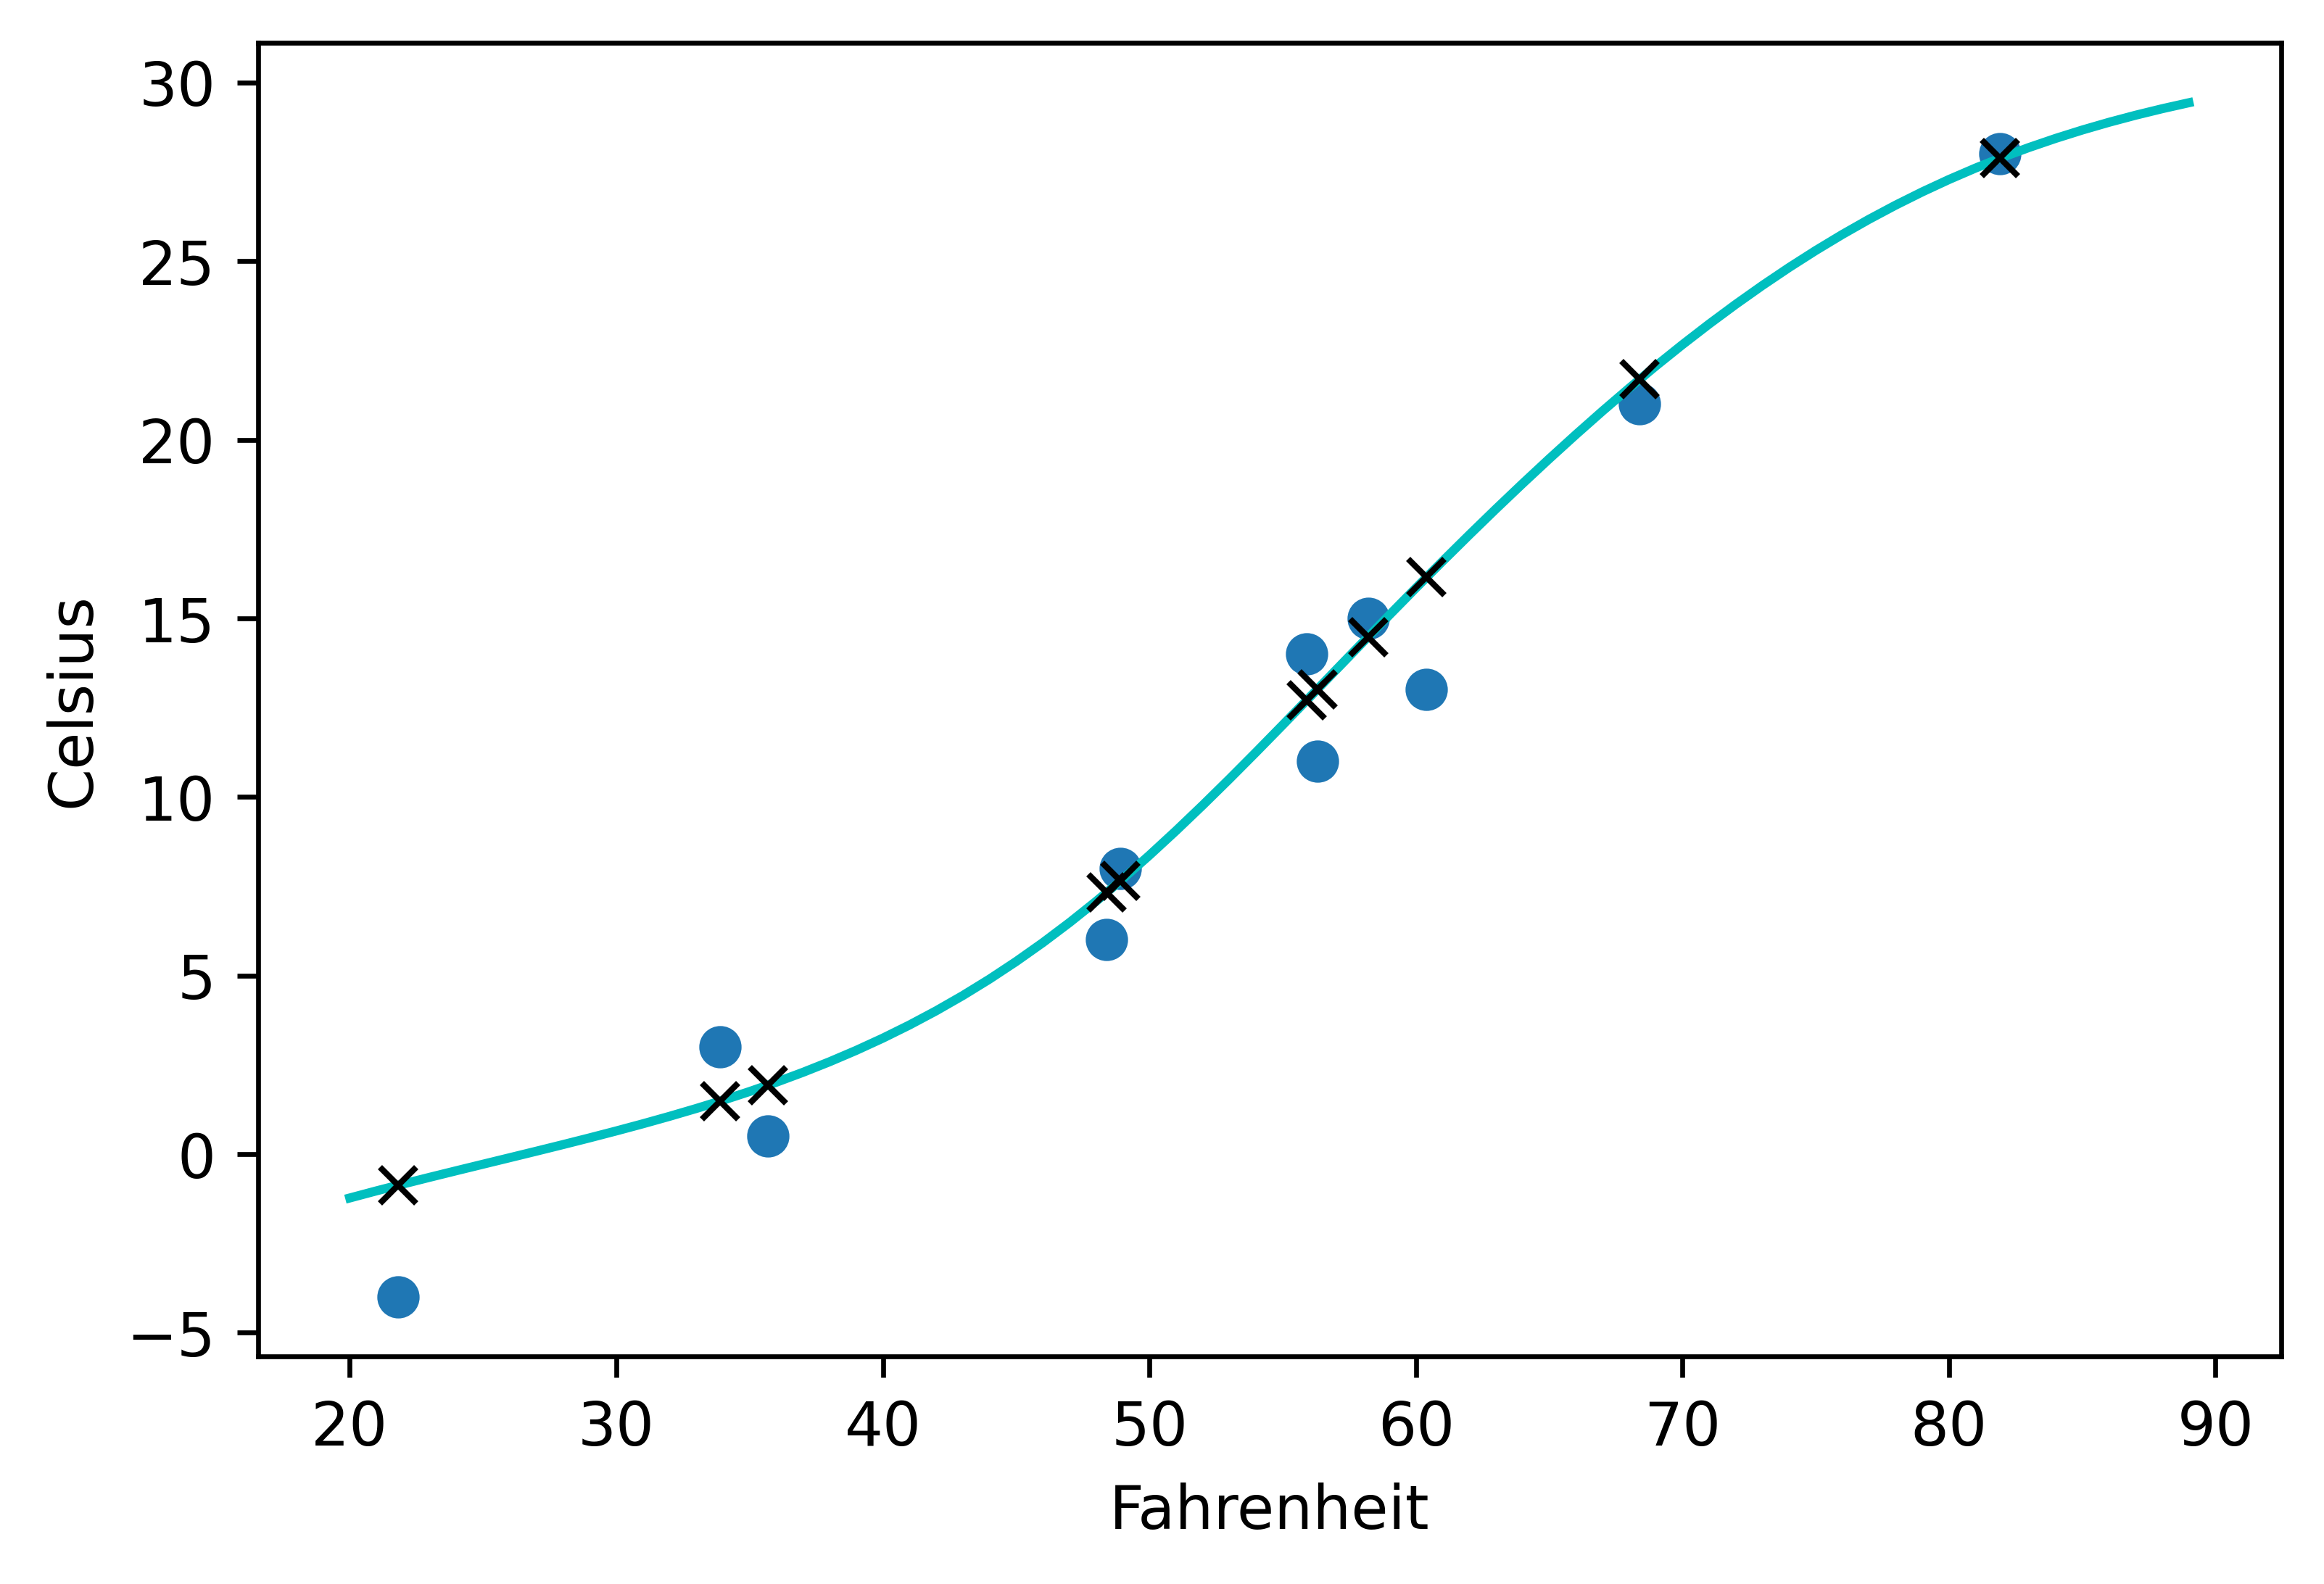

In [56]:
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")


## EXERCISE

### Q-1

1.   What changes result in more linear output from the model?

--> Lesser no. of neurons in the hidden layer. 


2. Can you get the model to overfit the data?

--> By increasing the number of neurons in hidden layer, you can get your model to overfit the data. 

### Q-2


#### READING WINE DATASET


In [3]:
import pandas as pd

wine_path = "/content/drive/My Drive/PyTorch/pytorch_start/data/p1ch4/tabular-wine/winequality-white.csv"
df = pd.read_csv(wine_path, delimiter=";")

# Mean normalization
df_y = df.pop("quality")
df_ = (df-df.mean()) / df.std()

data = torch.from_numpy(df_.values).to(torch.float32)
y = torch.from_numpy(df_y.values).to(torch.float32)


In [4]:
train_valid_split = 0.8
n_samples = data.shape[0]
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:int(len(shuffled_indices)*train_valid_split)]
valid_indices = shuffled_indices[int(len(shuffled_indices)*train_valid_split):]

data_train = data[train_indices,:]
y_train = y[train_indices]

data_valid = data[valid_indices, :]
y_valid = y[valid_indices]



In [5]:
print("TRAIN")
print(data_train.shape, y_train.shape)

print("\n", "VALID")
print(data_valid.shape, y_valid.shape)


TRAIN
torch.Size([3918, 11]) torch.Size([3918])

 VALID
torch.Size([980, 11]) torch.Size([980])


#### TRAINING ON WINE DATASET

In [8]:
def training_loop(n_epochs, optimzer, model, loss_fn, data_train, data_valid, y_train, y_valid):

  for epoch in range(1, n_epochs+1):

    t_p_train = model(data_train)
    loss_train = loss_fn(t_p_train, y_train)

    t_p_val = model(data_valid)
    loss_val = loss_fn(t_p_val, y_valid)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch < 4 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {loss_train:.4f},"
            f"Validation Loss {loss_val: .4f}")


In [9]:
seq_model = nn.Sequential(nn.Linear(11, 32), nn.Tanh(), nn.Linear(32, 1))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(n_epochs=1000, optimzer=optimizer, model = seq_model, loss_fn=nn.MSELoss(),
              data_train=data_train, data_valid = data_valid, y_train = y_train, y_valid = y_valid)

print("\n"*3)
print("output", seq_model(data_valid[:5]))
print("answer", y_valid[:5])


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([3918])) that is different to the input size (torch.Size([3918, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([980])) that is different to the input size (torch.Size([980, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training Loss 37.9334,Validation Loss  37.3830
Epoch 2, Training Loss 37.6553,Validation Loss  37.1132
Epoch 3, Training Loss 37.3890,Validation Loss  36.8451
Epoch 500, Training Loss 0.9036,Validation Loss  0.9270
Epoch 1000, Training Loss 0.8345,Validation Loss  0.8579




output tensor([[6.0546],
        [5.9327],
        [6.1348],
        [5.9160],
        [5.9921]], grad_fn=<AddmmBackward>)
answer tensor([5., 7., 6., 5., 5.])
